# Import Libraries 

In [1]:
# Data analysis tools
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn: Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    root_mean_squared_error,
    confusion_matrix,
    classification_report,
    r2_score
)
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Data Inspection and Preprocessing 

In [2]:
file_path = r'C:\Users\saman\workspace\data_analysis_internship\Project_4\doc\data\Customer_Sales_Cleaned.csv'
sales_data = pd.read_csv(file_path)

In [3]:
sales_data.head()

,Date,Customer_Id,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,"Fri, 12 Apr 2024 00:00:00",1,56,Female,142418.0,7,391.0,8083,1,15376,3,Low,32526,0,0
1,"Wed, 21 Feb 2024 00:00:00",2,69,Male,63088.0,82,652.0,34328,2,6889,6,Low,78493,0,0
2,"Tue, 02 Apr 2024 00:00:00",3,46,Male,136868.0,91,662.0,47891,2,6054,29,Medium,57198,1,0
3,"Mon, 15 Jan 2024 00:00:00",4,32,Female,85375.5,34,644.0,25103,2,4868,8,Medium,48395,0,0
4,"Tue, 16 Apr 2024 00:00:00",5,60,Male,59811.0,91,469.0,44891,1,17585,12,High,29031,1,0


In [4]:
sales_data.rename(columns={
    'Customer_Sales[Date]': 'Date',
    'Customer_Sales[Customer_ID]': 'Customer_Id',
    'Customer_Sales[Age]': 'Age',
    'Customer_Sales[Gender]': 'Gender',
    'Customer_Sales[Income]': 'Income',
    'Customer_Sales[Spending_Score]': 'Spending_Score',
    'Customer_Sales[Credit_Score]': 'Credit_Score',
    'Customer_Sales[Loan_Amount]': 'Loan_Amount', 
    'Customer_Sales[Previous_Defaults]': 'Previous_Defaults',
    'Customer_Sales[Marketing_Spend]': 'Marketing_Spend', 
    'Customer_Sales[Purchase_Frequency]': 'Purchase_Frequency',
    'Customer_Sales[Seasonality]': 'Seasonality',
    'Customer_Sales[Sales]': 'Sales',
    'Customer_Sales[Customer_Churn]': 'Customer_Churn',
    'Customer_Sales[Defaulted]': 'Defaulted',
}, inplace=True)

In [5]:
sales_data.columns

Index(['Date', 'Customer_Id', 'Age', 'Gender', 'Income', 'Spending_Score',
       'Credit_Score', 'Loan_Amount', 'Previous_Defaults', 'Marketing_Spend',
       'Purchase_Frequency', 'Seasonality', 'Sales', 'Customer_Churn',
       'Defaulted'],
      dtype='object')

In [6]:
sales_data.shape

(500, 15)

In [7]:
sales_data.dtypes

Date                   object
Customer_Id             int64
Age                     int64
Gender                 object
Income                float64
Spending_Score          int64
Credit_Score          float64
Loan_Amount             int64
Previous_Defaults       int64
Marketing_Spend         int64
Purchase_Frequency      int64
Seasonality            object
Sales                   int64
Customer_Churn          int64
Defaulted               int64
dtype: object

In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                500 non-null    object 
 1   Customer_Id         500 non-null    int64  
 2   Age                 500 non-null    int64  
 3   Gender              500 non-null    object 
 4   Income              500 non-null    float64
 5   Spending_Score      500 non-null    int64  
 6   Credit_Score        500 non-null    float64
 7   Loan_Amount         500 non-null    int64  
 8   Previous_Defaults   500 non-null    int64  
 9   Marketing_Spend     500 non-null    int64  
 10  Purchase_Frequency  500 non-null    int64  
 11  Seasonality         500 non-null    object 
 12  Sales               500 non-null    int64  
 13  Customer_Churn      500 non-null    int64  
 14  Defaulted           500 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 58.7+ K

In [9]:
sales_data.duplicated().sum()

np.int64(0)

In [10]:
sales_data['Defaulted'].value_counts()

Defaulted
0    405
1     95
Name: count, dtype: int64

In [11]:
# Select numeric columns
numeric_cols = sales_data.select_dtypes(include=[np.number])
numeric_cols = numeric_cols.iloc[:, 1:-2]  # exclude last 2 columns

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Display it
print(correlation_matrix)

                         Age    Income  Spending_Score  Credit_Score  \
Age                 1.000000  0.026413        0.014352      0.103696   
Income              0.026413  1.000000       -0.058831      0.067674   
Spending_Score      0.014352 -0.058831        1.000000      0.038735   
Credit_Score        0.103696  0.067674        0.038735      1.000000   
Loan_Amount         0.028699 -0.056456        0.012632      0.049621   
Previous_Defaults  -0.005668  0.024924        0.059393     -0.019656   
Marketing_Spend    -0.045104 -0.060032       -0.002106     -0.034413   
Purchase_Frequency  0.002320 -0.037541        0.005489      0.043713   
Sales              -0.014974  0.089528       -0.023959     -0.007856   

                    Loan_Amount  Previous_Defaults  Marketing_Spend  \
Age                    0.028699          -0.005668        -0.045104   
Income                -0.056456           0.024924        -0.060032   
Spending_Score         0.012632           0.059393        -0.00210

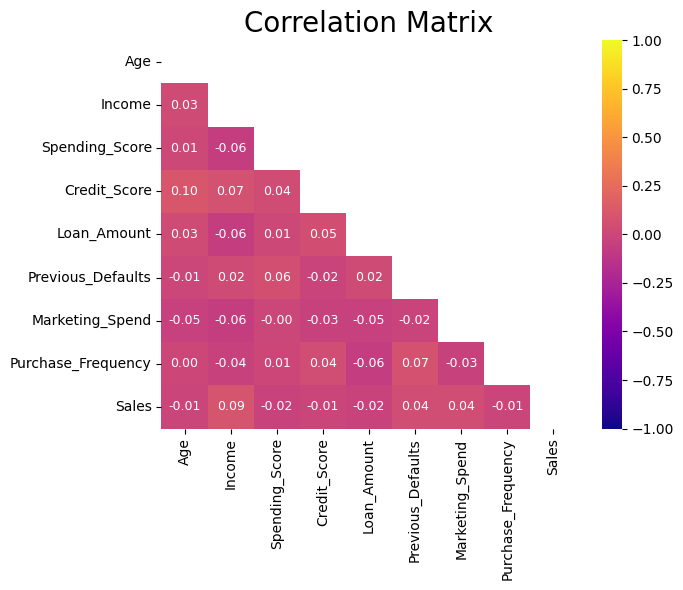

In [12]:
# Mask the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='plasma', cbar=True, annot_kws={"size": 9}, vmin=-1, vmax=1)

plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [13]:
# Separate by class
df_0 = sales_data[sales_data['Defaulted'] == 0]
df_1 = sales_data[sales_data['Defaulted'] == 1]

# Remove outliers from each class using IQR
def iqr_filter(df):
    numeric = df.select_dtypes(include=[np.number])
    Q1 = numeric.quantile(0.25)
    Q3 = numeric.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((numeric < (Q1 - 1.5 * IQR)) | (numeric > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]

df_0_clean = iqr_filter(df_0)
df_1_clean = iqr_filter(df_1)

# Combine cleaned data
df_cleaned = pd.concat([df_0_clean, df_1_clean], ignore_index=True)

print(f'Before: {sales_data.shape} | After: {df_cleaned.shape}')


Before: (500, 15) | After: (402, 15)


In [14]:
df_cleaned['Defaulted'].value_counts()

Defaulted
0    307
1     95
Name: count, dtype: int64

# Predictive Modelling

## Linear Regression 

In [38]:
# Prepare features and target

# One-hot encode 'Seasonality'
df_encoded = pd.get_dummies(df_cleaned, columns=['Seasonality'], drop_first=True)

# Select features and target
X = df_encoded[['Marketing_Spend'] + [col for col in df_encoded.columns if col.startswith('Seasonality')]]
y = df_encoded['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Used StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluate
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

print(f"Regression Co-efficients:", lr.coef_, lr.intercept_)

RMSE: 167.82
R^2 Score: 0.00
Regression Co-efficients: [1345.79972656 -718.78510476  714.14399263] 53286.052959501554


The model shows negative R square claiming it predicts the data poorly, however, shows small error. This is because the sales data has no strong linear relationship as can be viewed by the correlation heatmap. Therefore, this model is not very useless as it is not capturing the variance of data.

In [36]:
df_cleaned['Sales'].mean()

np.float64(53686.835820895525)

# Random Forest

In [26]:
# Random Forest Classifier to Customer Churn Prediction

# Encode target variable
le = LabelEncoder()
sales_data['Customer_Churn'] = le.fit_transform(sales_data['Customer_Churn'])  # 'Yes'=1, 'No'=0

# One-hot encode 'Seasonality'
df_encoded = pd.get_dummies(sales_data, columns=['Seasonality'], drop_first=True)

# Select features and target
feature_cols = ['Marketing_Spend', 'Purchase_Frequency'] + \
               [col for col in df_encoded.columns if col.startswith('Seasonality_')]

X = df_encoded[feature_cols]
y = df_encoded['Customer_Churn']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Balance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)

# Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.536
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.60      0.66        93
           1       0.23      0.34      0.28        32

    accuracy                           0.54       125
   macro avg       0.48      0.47      0.47       125
weighted avg       0.60      0.54      0.56       125



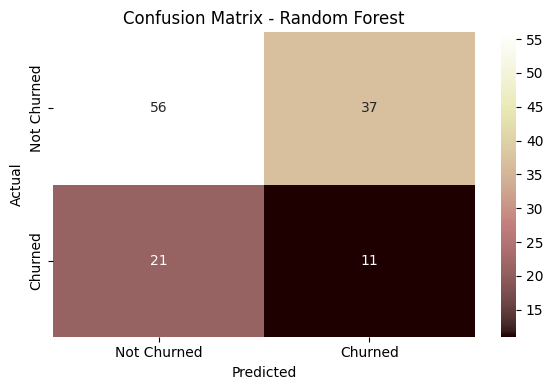

In [33]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show() 

In [34]:
# Random Forest Classifier to predict default risk

# Encode target variable
le = LabelEncoder()
sales_data['Defaulted'] = le.fit_transform(sales_data['Defaulted'])  # 'Yes'=1, 'No'=0

X = sales_data[['Income', 'Loan_Amount', 'Credit_Score']] 
y = sales_data['Defaulted']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE on training data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Train Random Forest on balanced data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_res, y_res)

# Predict & Evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.648
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       101
           1       0.21      0.29      0.24        24

    accuracy                           0.65       125
   macro avg       0.51      0.51      0.51       125
weighted avg       0.70      0.65      0.67       125



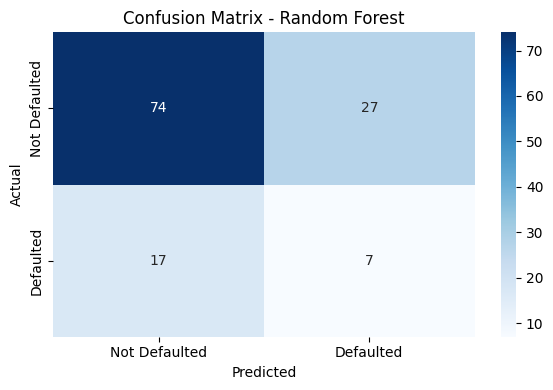

In [35]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

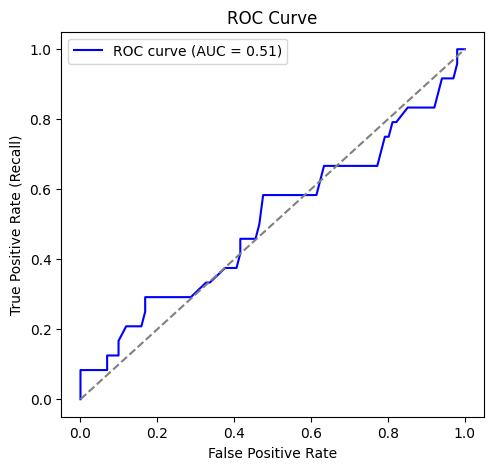

In [18]:
# Predict probabilities for the positive class
y_scores = rf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

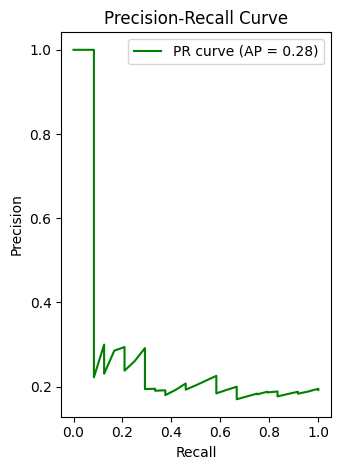

In [19]:
# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'PR curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()